<a href="https://colab.research.google.com/github/sberniz/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/Santiago_Berniz_LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pip installation
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=546c8645cf4724a0236483f72e666b32efac940acba9edd42887f30d55cdbb5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-y4glvc2s/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [175]:
!pip install squarify

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import requests
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [159]:
# Import Listings
job_listing = pd.read_csv('https://raw.githubusercontent.com/sberniz/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv',encoding='utf-8')

In [160]:
job_listing

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


In [162]:
job_listing['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [163]:
def clean_description(string):
  soup = BeautifulSoup(string,features='html.parser')
  text = soup.get_text()
  text = text.replace('\\n',' ')
  text = text.replace('\\xe2\\x80\\x93',' ')
  text = text.replace('\\xe2\\x80\\x99',' ')
  text = text.replace('\\xe2\\x80\\xa6',' ')
  text = text.replace('\\xe2\\x80\\x94',' ')
  text = text[1:]
  text = re.sub('[^a-zA-Z 0-9]','',text)
  return text

In [164]:
job_listing['description'] = job_listing['description'].apply(clean_description)

In [165]:
job_listing.head()

,Unnamed: 0,description,title
0,0,Job Requirements Conceptual understanding in M...,Data scientist
1,1,Job Description As a Data Scientist 1 you wil...,Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,4969 6756 a monthContractUnder the general su...,Data Scientist
4,4,Location USA multiple locations 2 years of A...,Data Scientist


In [166]:
#Remove extra column
job_listing.drop('Unnamed: 0',axis=1,inplace=True)

In [167]:
job_listing['description'][4]

'Location USA   multiple locations 2 years of Analytics experience Understand business requirements and technical requirements Can handle data extraction preparation and transformation Create and implement data models'

In [168]:
job_listing.head(1)

,description,title
0,Job Requirements Conceptual understanding in M...,Data scientist


## 2) Use Spacy to tokenize the listings 

In [169]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.lower().strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [170]:
job_listing['tokens']  = job_listing['description'].apply(tokenize)

In [171]:
job_listing.head(5)

,description,title,tokens
0,Job Requirements Conceptual understanding in M...,Data scientist,"[job, requirement, conceptual, understanding, ..."
1,Job Description As a Data Scientist 1 you wil...,Data Scientist I,"[job, description, , data, scientist, 1, help,..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res..."
3,4969 6756 a monthContractUnder the general su...,Data Scientist,"[4969, , 6756, monthcontractunder, general, su..."
4,Location USA multiple locations 2 years of A...,Data Scientist,"[location, usa, , multiple, location, 2, year,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [172]:
text = job_listing['description']
# create the transformer
vect = CountVectorizer(stop_words='english')

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

In [173]:
# Get Word Counts for each document
dtmdf = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtmdf

,00,02,02115,03,030,030547069,031819,032519,041819,06366,10,100,1000,100000,100000125000,1001,1008,100908,100x,1020,1026036,105000,1079302,1082692,10b,10ms,10person,10x,11,110418,110k,114157802,1159,11695,12,120,1200,120000,1214,125000,...,xefxbbxbf,xgboost,xpo,yardsxc2xae,year,yeara,yearas,yearcollects,yeardescription,yearjob,yearlrs,years,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yeti,yield,york,youd,youll,young,youre,youtube,youve,yrs,zenreach,zero,zeus,zf,zheng,zillow,zillows,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [199]:
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [207]:
wc = pd.DataFrame(get_top_n_words(job_listing['description'],20),columns=['word','freq'])

In [177]:
import squarify

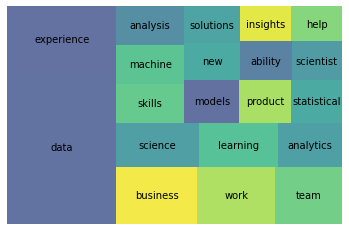

In [211]:
squarify.plot(sizes=wc['freq'], label=wc['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [214]:
data = job_listing['description']
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=.97,
                        min_df=.02,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm1 = tfidf.fit_transform(data) # Similiar to fit_predict



In [216]:

dtmdf1 = pd.DataFrame(dtm1.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtmdf1.head()

,,,2,3,4,ability,additional,advanced,analytic,apply,bachelor,benefit,build,business,collaborate,company,customer,data,datum,design,desire,develop,digital,education,equal,essential,excellent,experience,ideal,job,join,key,lead,learn,look,marketing,master,minimum,need,opportunity,...,work partner,work product,work project,work stakeholder,work team,workflow,workforce,working,worklife,worklife balance,workload,workplace,world,world,world forward,world motion,world s,worldclass,worldwide,would,wrangle,write,write code,write communication,write verbal,writing,xe2x80x9cbig,xe2x80x9cbig dataxe2x80x9d,year,year,year datum,year experience,year handson,year industry,year professional,year relevant,year work,yes,york,york city
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072518,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.174837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069346,0.048377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049054,0.0,0.065757,0.0,0.0,0.0,...,0.0,0.062867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057362,0.0,0.0,0.0,0.062016,0.0,0.0,0.019508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.127863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.073820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.090602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [217]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
near_neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
near_neighbor.fit(dtm1)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [221]:
data[20][:200]

'45000 a yearWorking under direction of the Associate Director for Decision Support Analytics this position will utilize statistical software visualization tools and a variety of data sources databases'

In [224]:
near_neighbor.kneighbors([dtmdf1.iloc[0].values])

(array([[0.        , 1.26944226, 1.27134039, 1.28038968, 1.28828094]]),
 array([[  0, 115, 366, 168, 336]]))

In [226]:
description = [ """ Work from home Data scientist with competitive compensation"""]
new = tfidf.transform(description)

In [228]:
near_neighbor.kneighbors(new.todense())

(array([[1.2701916 , 1.2875579 , 1.30259892, 1.30484297, 1.31947664]]),
 array([[244, 200, 417, 299, 313]]))

In [229]:
data[244][:200]

'Zeus  Flawless Stays  Founded in November 2015 and based in San Francisco California Zeus is shaking up the 18b corporate housing industry through its unique strategy of leasing unfurnished privatelyo'

In [266]:
arr = near_neighbor.kneighbors(new.todense())

In [267]:
arr

(array([[1.2701916 , 1.2875579 , 1.30259892, 1.30484297, 1.31947664]]),
 array([[244, 200, 417, 299, 313]]))

In [286]:
def find(description):
  
  new = tfidf.transform(description)
  arr = near_neighbor.kneighbors(new.todense())
  return data[arr[1][0][0]]

In [288]:
job_listing[job_listing['description'] == find(description)]

,description,title,tokens
244,Zeus Flawless Stays Founded in November 2015...,Data Scientist,"[zeus, , flawless, stays, , found, november, 2..."


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 